# **3. Regresion Logistica (L1/L2):**

Se selccionan las variables explicativas y la respuesta.

In [2]:

from sklearnex import patch_sklearn
patch_sklearn()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import math
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\taran\\OneDrive\\Desktop\\ML_PF_entrega3\\PF_GestHospitalClasificacion_Entrega3\\data\\PF_POSTPROCES_DATA_LIMPIA.csv")

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [14]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,Genitourinario,Piel y tejido subcutáneo,Musculoesquelético,Digestivo,Síntomas mal definidos,Trastornos mentales,Sistema nervioso,Otro,Anomalías congénitas,Órganos de los sentidos
0,Caucasian,Female,[0-10),6,25,1,1,Pediatrics,41,0,...,False,False,False,False,False,False,False,False,False,False
1,Caucasian,Female,[10-20),1,1,7,3,Other,59,0,...,False,False,False,False,False,False,False,False,False,False
2,AfricanAmerican,Female,[20-30),1,1,7,2,Other,11,5,...,False,False,False,False,False,False,False,False,False,False
3,Caucasian,Male,[30-40),1,1,7,2,Other,44,1,...,False,False,False,False,False,False,False,False,False,False
4,Caucasian,Male,[40-50),1,1,7,1,Other,51,0,...,False,False,False,False,False,False,False,False,False,False


In [3]:
X = df.drop("readmitted", axis=1)
y = df["readmitted"].map({"NO": 0, "SI": 1})  

Se separan el conjunto de entrenamiento y test.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Creamos vectores con cada tipo de variable para hacer el correcto manejo de las variables antes de modelar.

In [5]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
num_features = X.select_dtypes(include=["int64", "float64"]).columns

A continuación, se crean los pipelines de preprocesamiento, modelo logístico con gridsearch y validación ccruzada estratificada, y modelo de knn con gridsearch y vlaidación cruzada estratificada.

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [7]:
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.title("Matriz de Confusión - Regresion Logistica (L1/L2)")
    plt.show()

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", round(accuracy, 3))
    print("Precision:", round(precision, 3))
    print("Recall:", round(recall, 3))
    print("F1-score:", round(f1, 3))
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - Regresion Logistica (L1/L2)")
    plt.legend(loc="lower right")
    plt.show()

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    }

In [8]:
logreg_l2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        penalty="l2",        # Regularización Ridge
        solver="lbfgs",      # compatible con L2
        max_iter=1000,
        random_state=42
    ))
])

In [9]:
logreg_l2.fit(X_train, y_train)

c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:319: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEnc...
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

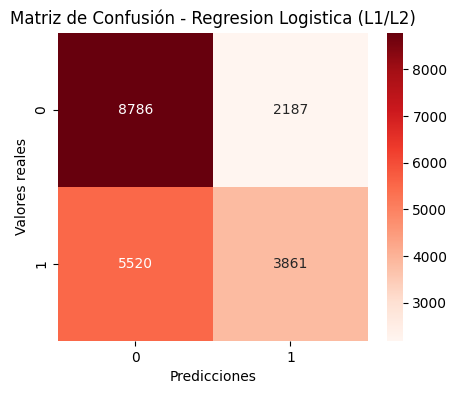

Accuracy: 0.621
Precision: 0.638
Recall: 0.412
F1-score: 0.5

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.61      0.80      0.70     10973
           1       0.64      0.41      0.50      9381

    accuracy                           0.62     20354
   macro avg       0.63      0.61      0.60     20354
weighted avg       0.63      0.62      0.61     20354



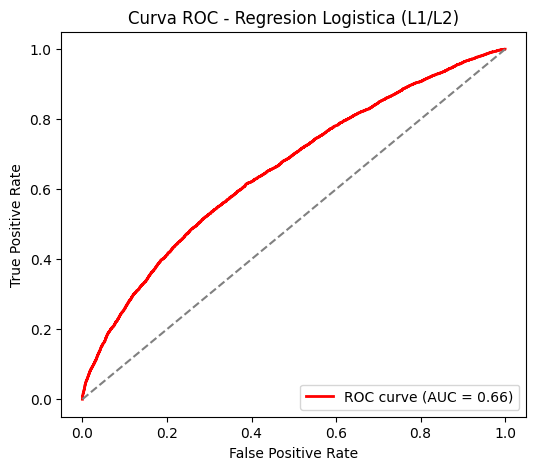

In [10]:
resultados_log_l2 = evaluar_modelo(logreg_l2, X_test, y_test)

In [12]:
logreg_l1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        penalty="l1",        # Regularización Lasso
        solver="saga",       # necesario para L1
        max_iter=1000,
        random_state=42
    ))
])

In [13]:
logreg_l1.fit(X_train, y_train)

c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEnc...
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    random_state=42, solver='saga'))])

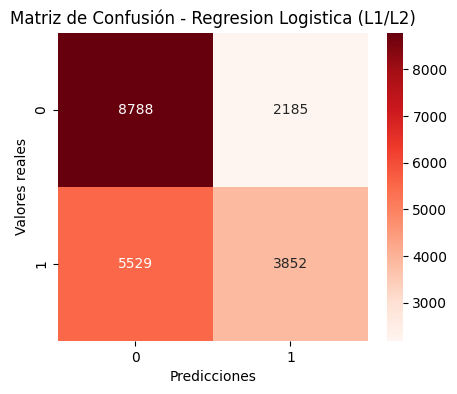

Accuracy: 0.621
Precision: 0.638
Recall: 0.411
F1-score: 0.5

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.61      0.80      0.69     10973
           1       0.64      0.41      0.50      9381

    accuracy                           0.62     20354
   macro avg       0.63      0.61      0.60     20354
weighted avg       0.62      0.62      0.60     20354



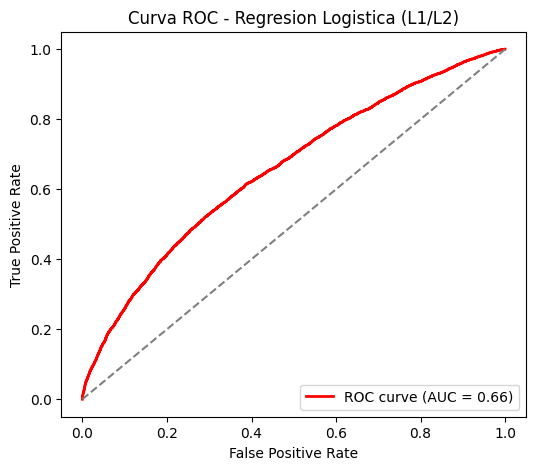

In [15]:
resultados_log_l1 = evaluar_modelo(logreg_l1, X_test, y_test)

In [16]:
tabla_resultados = pd.DataFrame([resultados_log_l2, resultados_log_l1])
print("\n=== Comparación de Regularización L1 vs L2 ===")
print(tabla_resultados)


=== Comparación de Regularización L1 vs L2 ===
   accuracy  precision    recall  f1_score   roc_auc
0  0.621352   0.638393  0.411577  0.500486  0.655700
1  0.621008   0.638065  0.410617  0.499676  0.655684


missing

El modelo de clasificación alcanza una exactitud de alrededor del 57.3%, lo que significa que acierta casi 6 de cada 10 casos, mostrando un mejor desempeño en la clase 0 que en la clase 1. La matriz de confusión evidencia que detecta más fácilmente los casos negativos (clase 0) que los positivos (clase 1), lo cual se refleja en un recall de 0.93 para la clase 0 frente a 0.15 en la clase 1. La precisión global es de 0.57 y el F1-score de 0.25, lo que señala un balance limitado entre precisión y recall, especialmente en la identificación de los positivos. La curva ROC, con un AUC de 0.62, indica que el modelo logra diferenciar las clases mejor que el azar, aunque con una capacidad discriminativa aún baja. En conjunto, los resultados muestran que el modelo es moderadamente útil, pero requiere mejoras para incrementar su capacidad de detección en la clase 1.